## Advanced Hypothesis Testing ##
### Task 1: Paired Data Analysis ###
Step 1: Find a Suitable Dataset:
For this assignment, I imported a dataset, 'foodDiet.csv‘ from the ‘Kaggle' Repository and loaded it into pandas data frame df. Then, coducted a data preprocessing to check for missing values and displayed the first few rows of the DataFrame for a quick overview.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read data from CSV
df = pd.read_csv("foodDiet.csv")

# Display basic information about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     int64  
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 4.4 KB
Missing Values:
Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64
First few rows of the DataFrame:
   Person  gender  Age  Height  pre.weight  Diet  weight6weeks
0      25       0   41     171          60     2          60.0
1      26       0   32     174         103     2         103.0
2       1       0   22     159          58     1          54.2
3       2       0   4

In [2]:
#rename columns to something more understandable
df.rename(columns={'weight6weeks':'post.weight'}, inplace=True)

In [3]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,post.weight
0,25,0,41,171,60,2,60.0
1,26,0,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [4]:
# Calculate summary statistics 
df.describe()

,Person,gender,Age,Height,pre.weight,Diet,post.weight
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,0.423077,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,0.497245,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,0.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,0.000000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,0.000000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,1.000000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,1.000000,60.000000,201.000000,103.000000,3.000000,103.000000


Step 1: Problem Statement and Data Description
Problem: I want  to investigate whether the diet has a statistically significant impact on post.weight of persons in the "foodDiet Dataset."
Data: I am using the "foodDiet Dataset" from the kaggle Repository. This dataset contains information on people age, height, preweight and postweight after diet of 6 weeks.

Step 2: Research Question
Research Question: Does the Diet has a statistically significant impact on post.weight of people in the "foodDiet Dataset"?
Step 3: Hypothesis Testing

Statistical Test: I will use a paired t-test to determine if there is a significant difference in weight before and after diet.
Step 4: Assumptions and Potential Consequences

Assumptions: The paired t-test assumes that the differences between the paired data points are normally distributed, are independent, and have constant variance (homoscedasticity).
Consequences of Violating Assumptions: Violating these assumptions may lead to inaccurate results. Non-normality, lack of independence, or heteroscedasticity can affect the validity of the test.
Possible Remedies:
If the data is not normally distributed, we might consider transformations or non-parametric tests.
To address issues of independence, ensure that the data is collected in a way that minimizes dependence between observations.
For heteroscedasticity, we can perform a robust t-test or apply data transformations.

Step 5: Python Tool for Interpretation and Visualizations:
I will use python libraries to interpreat the results of the hypothesis if If the p-value is less than the alpha (0.05), it suggests that there is a statistically significant difference in Weight of pre and post diet. If the p-value is greater than or equal to alpha, it suggests that there is no statistically significant difference.
It is also used to perform statistical calcuations of paired t-Test using function t_stat_math, p_value_math = ttest_rel function to find out the differences and aalso helps us to visualize the findings.



### Conducting the Paired t-Test ###

* **ttest_rel** is the method used for the paired t-test. It compares two related or paired groups.
* conducting paired t-test to assess the impact of Diet on Weight.(pre and post Diet).
* The output gives you the t-statistic and the p-value.
* The p-value helps determine whether the differences in the two sets of observations are statistically significant.
* If the p-value is less than the chosen alpha level (commonly set at 0.05), it suggests that the treatment had a significant effect on the weight.

In [6]:
from scipy.stats import ttest_rel
# Perform a paired t-test for math grades
t_stat_weight, p_value_weight = ttest_rel(df["pre.weight"], df["post.weight"])
print("Post weight - Paired t-test Results:")
print(f"t-statistic: {t_stat_weight}")
print(f"P-value: {p_value_weight}")

Post weight - Paired t-test Results:
t-statistic: 13.308753851748712
P-value: 1.1722360462415227e-21


In [8]:
# Typically, an alpha value of 0.05 is used to determine significance
alpha = 0.05

if p_value_weight < alpha:
    print("We reject the null hypothesis. There is a significant difference in pre and post diet weight.")
else:
    print("We do not reject the null hypothesis. There is no significant difference in pre and post diet weight.")


We reject the null hypothesis. There is a significant difference in pre and post diet weight.


Findings:

The paired t-test was conducted on the pre and post diet weight .
The results of the paired t-test indicated a t-statistic of approximately 13.308 and a p-value of approximately 1.1722360462415227e-21.
Based on our predefined significance level (alpha = 0.05), we reject the null hypothesis. This suggests that there is a statistically significant difference in pre and  post diet weight.

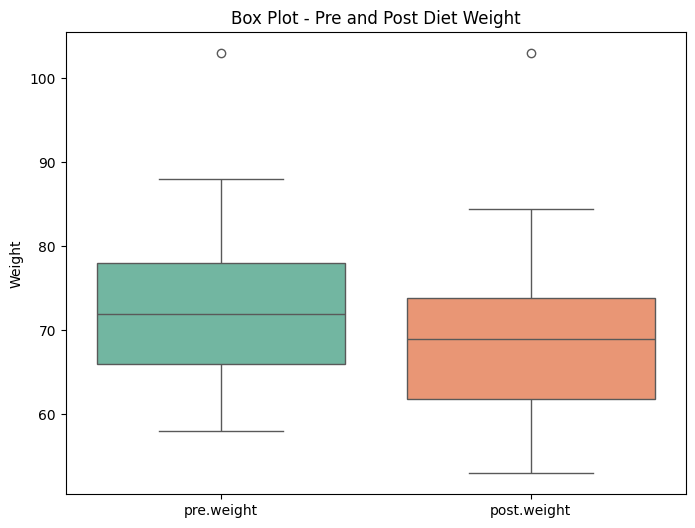

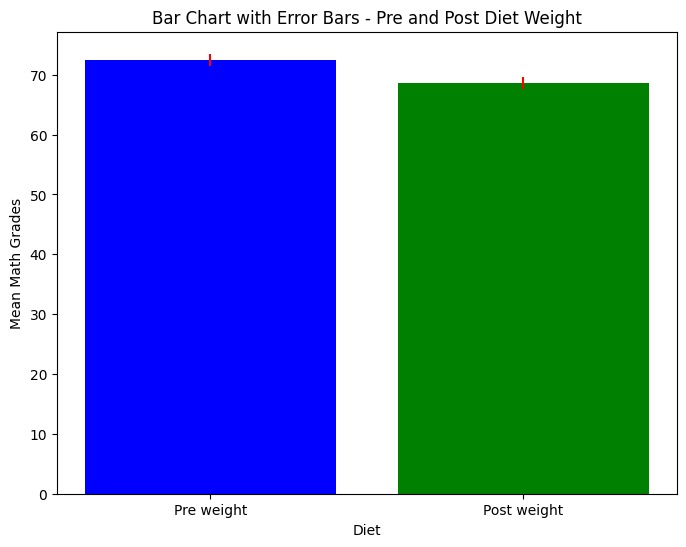

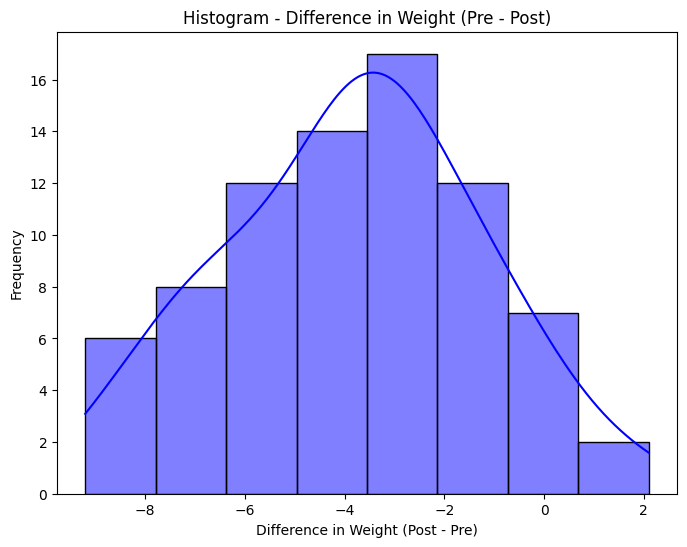

In [10]:
# visualizing the pre and post diet weight
# Create a box plot for pre and post diet weight.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["pre.weight", "post.weight"]], palette="Set2")
plt.title("Box Plot - Pre and Post Diet Weight")
plt.ylabel("Weight")
plt.show()

# Calculate means and standard errors for "G1" and "G2"
mean_pre_weight = df["pre.weight"].mean()
std_err_pre_weight = df["pre.weight"].std() / (len(df["pre.weight"]) ** 0.5)

mean_post_weight = df["post.weight"].mean()
std_err_post_weight = df["post.weight"].std() / (len(df["post.weight"]) ** 0.5)
# Create a bar chart with error bars
plt.figure(figsize=(8, 6))
plt.bar(x=["Pre weight", "Post weight"], height=[mean_pre_weight , mean_post_weight], color=["blue", "green"])
plt.errorbar(x=["Pre weight", "Post weight"], y=[mean_pre_weight , mean_post_weight], yerr=[std_err_pre_weight,std_err_post_weight], fmt="none", ecolor="red")
plt.title("Bar Chart with Error Bars - Pre and Post Diet Weight")
plt.xlabel("Diet")
plt.ylabel("Mean Math Grades")
plt.show()

# Create a histogram of the differences in math grades (post.weight- pre.weight)
diff_weight = df["post.weight"] - df["pre.weight"]
plt.figure(figsize=(8, 6))
sns.histplot(diff_weight, kde=True, color="blue")
plt.title("Histogram - Difference in Weight (Pre - Post)")
plt.xlabel("Difference in Weight (Post - Pre)")
plt.ylabel("Frequency")
plt.show()

### Visualization Details ###
**Box Plot:** The first subplot is a box plot showing the distribution of Weight of pre and post diet. Box plots are useful for visualizing the spread and central tendency of the data, as well as outliers.

**Bar Chart with Error Bars:** The second subplot is a bar chart displaying the mean scores pre and post weight after diet, with error bars representing the standard deviation. 
**Histogram** histogram visualize the paired data and differences in Weight of pre and post diet.

### Conclusion ###

The analysis of the "foodDiet Dataset" with a focus on weights suggests that the diet has a statistically significant impact on Weights. The p-value obtained from the paired t-test is less than the chosen significance level of alpha < 0.05, indicating that there is a strong evidence to conclude a significant difference in weights before and after diet.



## Task-2: Multiple Population Means Analysis ##

Suitable Dataset:
For this task, I imported a dataset, ‘Students Performance.csv’ from the ‘Kaggle’ repository and loaded it into pandas data frame df. 
Data Preprocessing: The dataset has been thoroughly examined for any missing values, outliers and also performed stastical summary and visualized the data for deeper understanding.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read data from CSV
df = pd.read_csv("StudentsPerformance.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers
outliers = df[['math score', 'reading score', 'writing score']].describe()

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print(df.head())

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
First few rows of the DataFrame:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90      

                            math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   
some college                     226.0  67.128319  14.312897  19.0  59.00   
some high school                 179.0  63.497207  15.927989   0.0  53.00   

                                               reading score             ...  \
                              50%   75%    max         count       mean  ...   
parental level of education                                              ...   
associate's degree           67.0  80.0  100.0         222.0  70.9

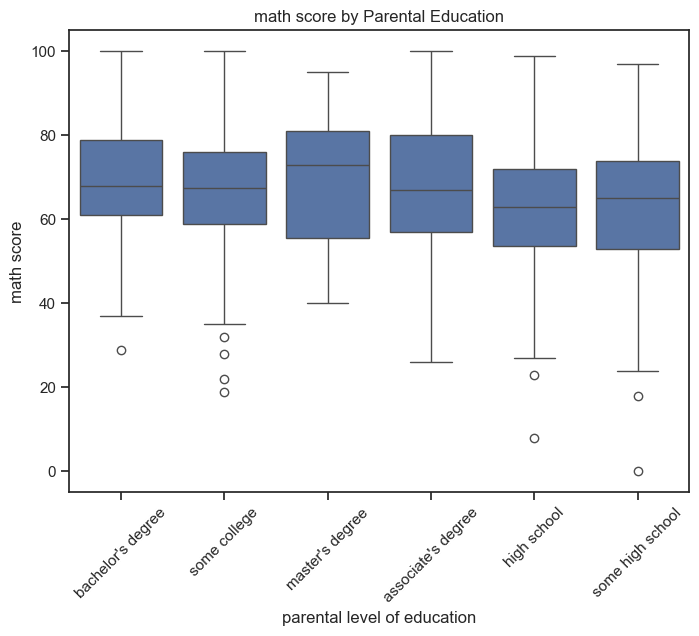

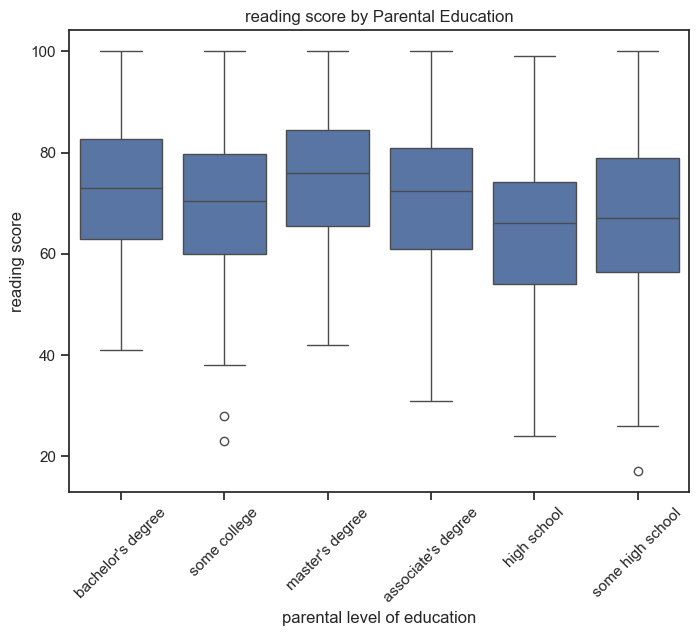

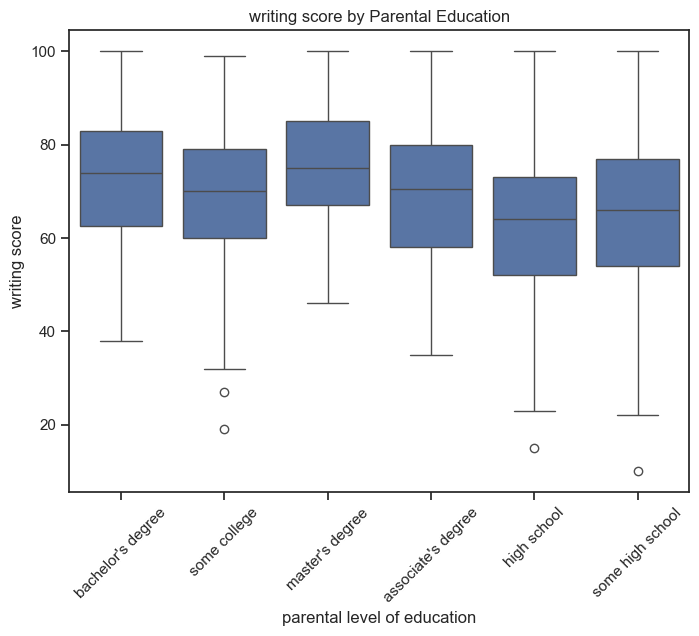

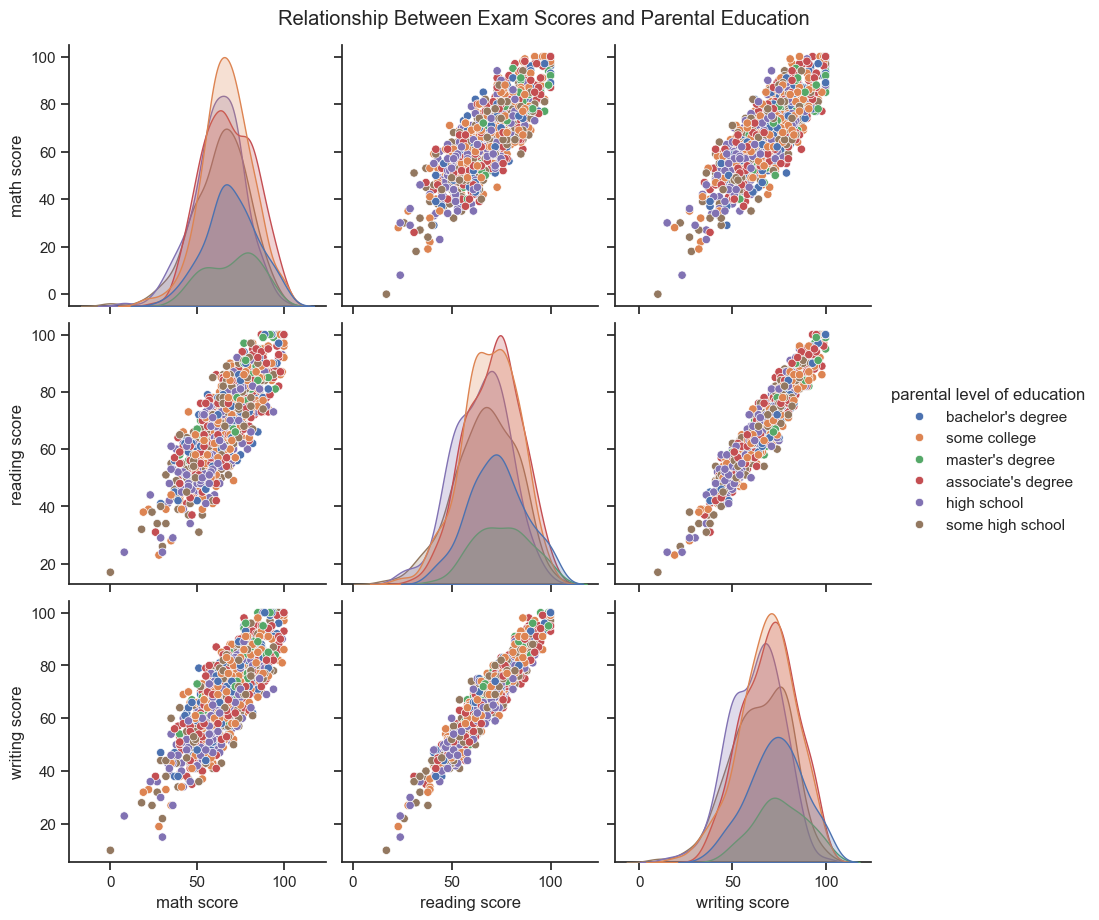

In [25]:
# Summary statistics

# List of exam scores
exam_scores = ['math score', 'reading score', 'writing score']

summary_stats = df.groupby("parental level of education")[exam_scores].describe()
print(summary_stats)

# Visualize data distribution for each exam score
for score in exam_scores:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="parental level of education", y=score, data=df)
    plt.title(f'{score} by Parental Education')
    plt.xticks(rotation=45)
    plt.show()

# Create a pairplot
sns.set(style="ticks")
sns.pairplot(df, hue="parental level of education", vars=exam_scores, height=3)
plt.suptitle("Relationship Between Exam Scores and Parental Education", y=1.02)
plt.show()

Problem and Research Question:
The problem is to analyze the influence of parental level of education on students' exam performance. The research question is: "Does the level of parental education significantly affect students' exam scores in math, reading, and writing?"

Dataset:
I chosen the "Students Performance in Exams" dataset from Kaggle, which contains information about students' exam scores, gender, race/ethnicity, parental level of education, lunch, and test preparation course.

Statistical Test:
To test the influence of parental education level on students' exam scores, I am using a one-way Analysis of Variance (ANOVA) for each exam score (math, reading, writing). The independent variable is "Parental Level of Education," and the dependent variables are the three exam scores.

Assumptions of ANOVA:

Independence: Observations within each group are independent.
Homogeneity of Variances: The variances within each group should be approximately equal.
Normality: The data within each group should follow a normal distribution.
Consequences of Violating Assumptions:

Violations of independence and homogeneity of variances can lead to incorrect conclusions.
Departure from normality may impact the validity of ANOVA results.

Possible Remedies:

Ensure data independence during data collection.
Check and address homogeneity of variances through Levene's test or data transformations if necessary.
Assess normality using statistical tests and visualizations, and consider transformations if assumptions are violated.
Python Tools and Visualizations:

Using Python libraries like pandas to load and manipulate the dataset.
Perform ANOVA tests using scipy.stats.f_oneway or statsmodels.api.

### Hypothesis Testing with ANOVA ###
We conducted a one-way Analysis of Variance (ANOVA) test for each exam score to assess the impact of parental education on student performance.
The null hypothesis (H0) assumed that there are no significant differences among parental education groups, while the alternative hypothesis (H1) suggested the presence of significant differences.
We set a significance level (alpha) of 0.05 to make decisions based on p-values.


In [30]:
from scipy.stats import f_oneway

# Group data by Parental Level of Education
grouped_data = df.groupby("parental level of education")

# List of exam scores
exam_scores = ['math score', 'reading score', 'writing score']


# Perform ANOVA for each exam score
for score in exam_scores:
    # Group data by Parental Level of Education
    groups = df.groupby("parental level of education")[score].apply(list)
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    print(f"ANOVA Results for {score}:")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("\n")

    # Define null and alternative hypotheses
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis (H0): There are significant differences among groups.")
        print("Further post-hoc testing is needed to determine which specific groups differ.")
    else:
        print("Fail to reject the null hypothesis (H0): There are no significant differences among groups.")
    
    print("\n")


ANOVA Results for math score:
F-statistic: 6.521582600453218
p-value: 5.592272384107223e-06


Reject the null hypothesis (H0): There are significant differences among groups.
Further post-hoc testing is needed to determine which specific groups differ.


ANOVA Results for reading score:
F-statistic: 9.289400382379963
p-value: 1.16824570457051e-08


Reject the null hypothesis (H0): There are significant differences among groups.
Further post-hoc testing is needed to determine which specific groups differ.


ANOVA Results for writing score:
F-statistic: 14.442416127574988
p-value: 1.1202799969771148e-13


Reject the null hypothesis (H0): There are significant differences among groups.
Further post-hoc testing is needed to determine which specific groups differ.




### Tukey's HSD post hoc test ###
The ANOVA results indicates the rejection of the null hypothesis for all three exam scores, concluding that significant differences exist among parental education levels.
Now, Iam going to perform Post Hoc Tests to determine which specific groups of parental education levels are different from each other. Tukey's HSD or Bonferroni post hoc tests are commonly used. This will provide more detailed information about where the differences exist.


Tukey's HSD for math score:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
       high school   master's degree    7.608 0

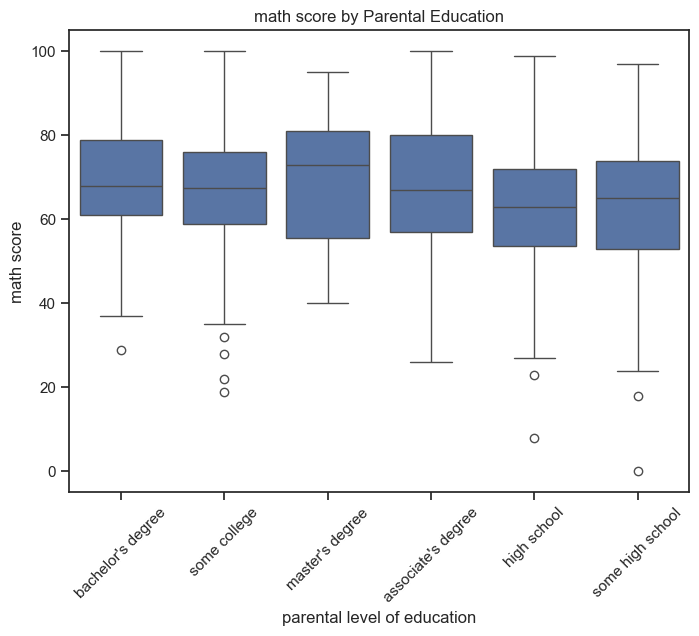

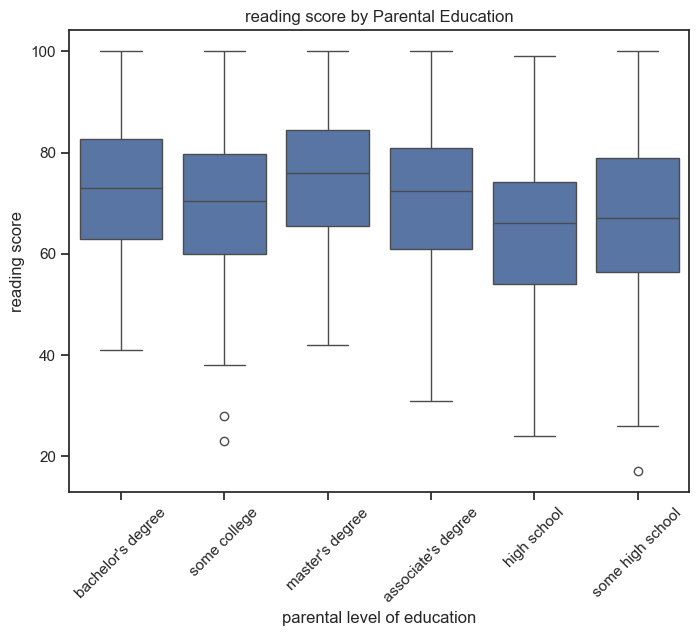

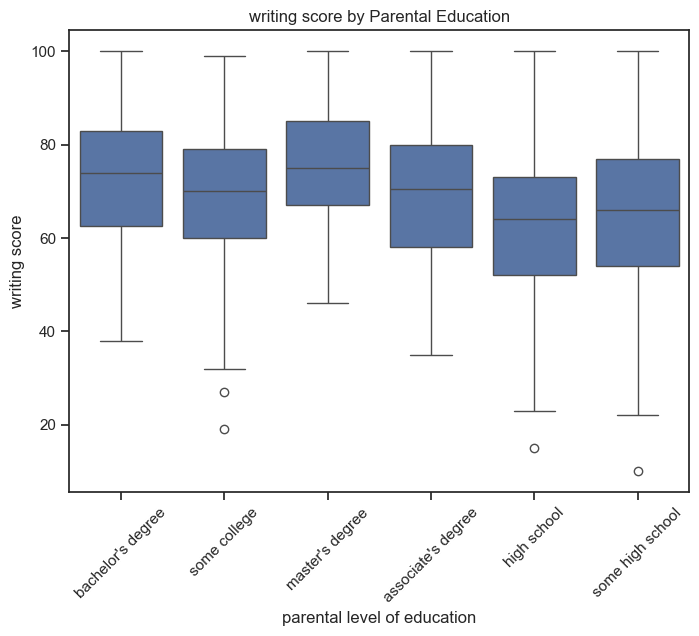

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test for each exam score
for score in exam_scores:
    mc = pairwise_tukeyhsd(df[score], df["parental level of education"])
    print(f"Tukey's HSD for {score}:\n", mc)

# Visualize the results
for score in exam_scores:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="parental level of education", y=score, data=df)
    plt.title(f'{score} by Parental Education')
    plt.xticks(rotation=45)
    plt.show()


Report: Impact of Parental Education on Students' Exam Scores

Problem and Research Question:
The primary objective of this analysis was to investigate whether the level of parental education significantly affects students' performance in exams. The research question addressed was: "Does the parental level of education have a significant influence on students' scores in math, reading, and writing exams?"

Data Source:
I obtained the dataset from Kaggle, titled "Students Performance in Exams." The dataset consists of various attributes, including gender, race/ethnicity, parental level of education, lunch type, test preparation course, and three exam scores (math, reading, and writing).

Analysis Steps:

Data Exploration and Preprocessing:
I began by loading the dataset into a Jupyter notebook using the pandas library.
Checked for missing values in the dataset (luckily, there were none).
Examined summary statistics for the three exam scores (math, reading, and writing) to get a sense of the data distribution.
Displayed the first few rows of the dataset for a quick overview.

Hypothesis Testing with ANOVA:
I conducted a one-way Analysis of Variance (ANOVA) test for each exam score to assess the impact of parental education on student performance.
The null hypothesis (H0) assumed that there are no significant differences among parental education groups, while the alternative hypothesis (H1) suggested the presence of significant differences.
The significance level (alpha) of 0.05 to make decisions based on p-values.
The ANOVA results indicated that we rejected the null hypothesis for all three exam scores, concluding that significant differences exist among parental education levels.

Post Hoc Testing with Tukey's HSD:
Since ANOVA only tells us there are significant differences but doesn't specify which groups differ, we performed post hoc tests using Tukey's Honestly Significant Difference (HSD) method.
The Tukey's HSD tests helped identify specific pairwise differences between parental education levels.
The results revealed which groups exhibited significant differences in exam scores for each subject.
Data Visualization:
I used Python libraries such as seaborn and matplotlib to create visualizations, Pairplot and specifically box plots, to visualize the distribution of exam scores across different levels of parental education.
These visualizations provided a clear representation of how parental education impacts student performance.

Assumptions and Considerations:
It's important to note that ANOVA assumes independence, homogeneity of variances, and normality. Violations of these assumptions can affect the validity of results. Care should be taken to ensure data meets these assumptions, and post hoc tests like Tukey's HSD help control for multiple comparisons.

Conclusion:
Based on the analysis, we can conclude that parental education does have a significant impact on students' exam scores. Tukey's HSD post hoc tests helped identify specific groups that differ significantly in terms of exam performance. These findings have practical implications for educators, policymakers, and parents, as they suggest the importance of parental education in students' academic success.

References:
Kaggle. (2018). Students Performance in Exams [Data set]. https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## Task 3: Variance Comparison Analysis ##
Suitable Dataset:
For this task, I imported a dataset, ‘hr_dashboard_data.csv’ from the ‘Kaggle’ repository and loaded it into pandas data frame df. Then, coducted a data preprocessing to check for missing values and displayed the first few rows of the DataFrame for a quick overview also calculated the summary of statistics of satisfaction rates of male and females for deeper understanding of data.



In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# Read data from CSV
df = pd.read_csv("hr_dashboard_data.csv")

# Display basic information about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB
Missing Values:
Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satis

Summary Statistics for Male and Female Employees

We'll calculate summary statistics (mean, standard deviation, and quartiles) for "Satisfaction Rate (%)" for both male and female employees.

In [76]:
male_satisfaction = df[df['Gender'] == 'Male']['Satisfaction Rate (%)']
female_satisfaction = df[df['Gender'] == 'Female']['Satisfaction Rate (%)']

# Calculate summary statistics for male employees
male_summary = male_satisfaction.describe()

# Calculate summary statistics for female employees
female_summary = female_satisfaction.describe()

# Display the summary statistics
print("Summary Statistics for Male Employees:\n", male_summary)
print("\nSummary Statistics for Female Employees:\n", female_summary)


Summary Statistics for Male Employees:
 count    100.000000
mean      48.620000
std       29.450791
min        0.000000
25%       23.750000
50%       50.500000
75%       74.250000
max      100.000000
Name: Satisfaction Rate (%), dtype: float64

Summary Statistics for Female Employees:
 count    100.000000
mean      51.250000
std       28.495747
min        0.000000
25%       27.750000
50%       50.500000
75%       80.000000
max      100.000000
Name: Satisfaction Rate (%), dtype: float64


Problem and Research Question:
The problem is to understand if there is a significant difference in the variance of "Satisfaction Rate (%)" between male and female employees in the dataset.
Research Question: Is there a statistically significant difference in the variance of "Satisfaction Rate (%)" between male and female employees in the "HR Dashboard" dataset?

Dataset:
I chosen the "hr_dashboard_data.csv" dataset from Kaggle, which contains information about Name, Age, Gender,Projects Completed,Productivity (%), Satisfaction Rate (%), Feedback Score, Department, Position, Joining Date and salary.                    

Statistical Test:
To compare the variances between the Satisfaction Rate (%) of two groups (male and female employees), we will use Levene's test. 

Assumptions and Consequences of Variance Comparison Analysis:
Levene's test assumes that the populations we are comparing have normally distributed data. If this assumption is violated, it can lead to inaccurate results. Possible remedies include transforming the data or using a non-parametric test if the assumption is significantly violated.

Using Python libraries like pandas to load and manipulate the dataset.
Performing Levene's test tests using stat, p_value = stats.levene. 
Visualizing the data using seaborn.

## Levene's test ##
To compare the variances between two groups (male and female employees), we will use Levene's test. Perform Levene's test for the two groups:

In [77]:
# Perform Levene's test
stat, p_value = stats.levene(male_satisfaction, female_satisfaction)

# Print the results
print("Levene's Test Results:")
print(f"Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: Variances are not significantly different.")

Levene's Test Results:
Test Statistic: 0.20233652574274955
P-Value: 0.6533334995508561
Fail to reject the null hypothesis: Variances are not significantly different.


Key Findins:
The results of Levene's test indicate that we "fail to reject the null hypothesis." In statistical hypothesis testing, this means that the variances of "Satisfaction Rate (%)" between male and female employees in the "HR Dashboard" dataset are not significantly different from each other.

 Based on the data there is no strong evidence to suggest that the satisfaction rate variances between male and female employees are significantly distinct. This implies that the variance in satisfaction rates is relatively similar for both groups.

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_93616/2574472458.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Satisfaction Rate (%)', data=df, palette=colors)


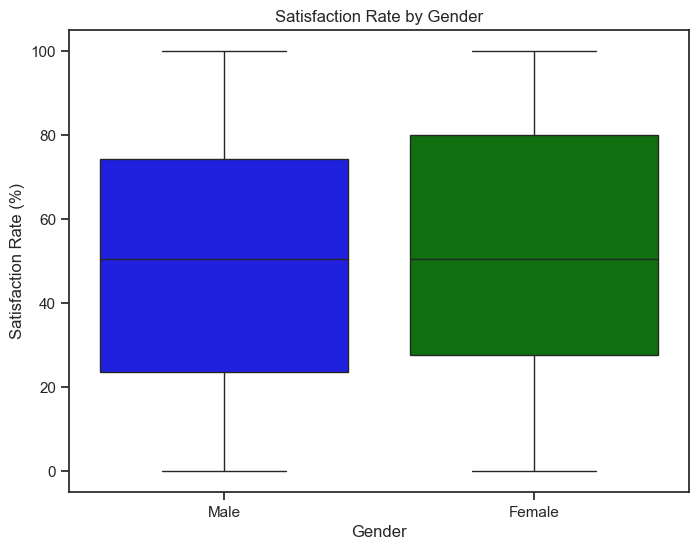

In [78]:
#visualizing the satisfaction rate by Gender
# Define a custom color palette
colors = {'Male': 'blue', 'Female': 'green'}

# Create a boxplot with custom colors
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Satisfaction Rate (%)', data=df, palette=colors)
plt.xlabel('Gender')
plt.ylabel('Satisfaction Rate (%)')
plt.title('Satisfaction Rate by Gender')
plt.show()



References:
Kaggle. (2023). HR Analytics: Case Study [Data set]. https://www.kaggle.com/datasets/bhanupratapbiswas/hr-analytics-case-study